In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [4]:
df=pd.read_csv('C:\DATA SCIENCE\PROJECT\indian_liver_patient.csv')

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
f"The Dataset is Made up Of {df.shape[0]} rows and {df.shape[1]} columns"

'The Dataset is Made up Of 583 rows and 11 columns'

In [6]:
for i in df.columns:
    print('The Each columns Uniqueness {}: {}'.format(i,df[i].nunique()))

The Each columns Uniqueness Age: 72
The Each columns Uniqueness Gender: 2
The Each columns Uniqueness Total_Bilirubin: 113
The Each columns Uniqueness Direct_Bilirubin: 80
The Each columns Uniqueness Alkaline_Phosphotase: 263
The Each columns Uniqueness Alamine_Aminotransferase: 152
The Each columns Uniqueness Aspartate_Aminotransferase: 177
The Each columns Uniqueness Total_Protiens: 58
The Each columns Uniqueness Albumin: 40
The Each columns Uniqueness Albumin_and_Globulin_Ratio: 69
The Each columns Uniqueness Dataset: 2


In [7]:
#checking for missing Data

df.apply(lambda X: (X.isnull().sum()))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
#checking the criteria we gat Missing data

df[df.isnull().any(axis=1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [9]:
filling_list=df['Albumin_and_Globulin_Ratio'].dropna().tolist()
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(pd.Series(np.random.choice(filling_list,size=len(df.index))))

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: >

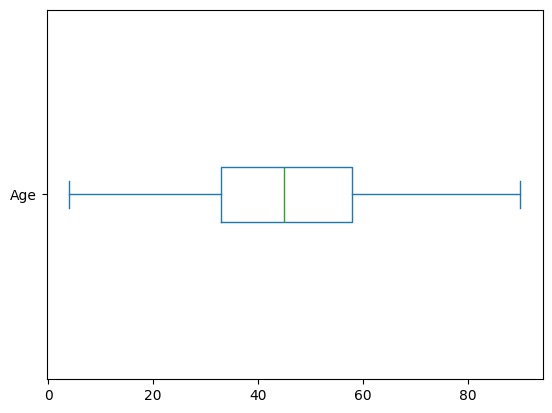

In [11]:
df['Age'].plot.box(vert=False)

In [12]:
df.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Age,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,0.946055,0.319047,0.3,0.7,0.92,1.1,2.8
Dataset,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [13]:
#first Let rename it

df=df.rename(columns={'Dataset':'class'})

In [14]:
df['class'].value_counts()

class
1    416
2    167
Name: count, dtype: int64

In [15]:
df['class']=df['class'].map({2:1,1:0})

In [16]:
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [17]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [18]:
X=df.drop('class',axis=1)

y=df['class']

In [19]:
model=[]
model.append(('BaggingClassifier',BaggingClassifier()))
model.append(('RandomForestClassifier',RandomForestClassifier()))
model.append(('ExtraTreesClassifier',ExtraTreesClassifier()))

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
results=[]
names=[]
for name,models in model:
    cv_result=cross_val_score(models,X_train,y_train,cv=5,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    dely='%s: %f (%f)'%(name,cv_result.mean(),cv_result.std())
    print(dely)

BaggingClassifier: 0.706391 (0.054692)
RandomForestClassifier: 0.737626 (0.041120)
ExtraTreesClassifier: 0.742983 (0.033185)


In [22]:
from sklearn.metrics import f1_score

Model=ExtraTreesClassifier()
Model.fit(X_train,y_train)
print(f1_score(y_test,Model.predict(X_test),average='macro'))

0.6119586847341988


In [23]:
pd.DataFrame(Model.feature_importances_,columns=['Features_Importance'],index=X.columns).sort_values(ascending=True,by ='Features_Importance')

,Features_Importance
Gender,0.026010
Albumin,0.093732
Total_Protiens,0.095627
Albumin_and_Globulin_Ratio,0.096280
Age,0.107657
Direct_Bilirubin,0.109738
Aspartate_Aminotransferase,0.115045
Total_Bilirubin,0.115176
Alamine_Aminotransferase,0.115462
Alkaline_Phosphotase,0.125272


In [24]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\users\ugoob\appdata\local\programs\python\python311\lib\site-packages (0.0)




[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm=SMOTE()

In [27]:
X,y=sm.fit_resample(X,y)

In [28]:
X.shape

(832, 10)

In [29]:
y.shape

(832,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [32]:
Model=ExtraTreesClassifier()
Model.fit(X_train,y_train)
y_predict=Model.predict(X_test)
f1_score(y_test,y_predict)

0.8524590163934426

In [ ]:
import pickle as pk

with open('model.pk','wb') as file:
  pk.dump(model,file)